# Step-1 Initialisation

In [ ]:
# Initialisation 
# Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import seaborn as sns 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


# Algorithm Related Initialisation

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# FOr KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# For sklearn metricinfo and diagram
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import metrics

import joblib
import pickle

In [2]:
#  Constants
modelfilepathwithName= ""+'finalized_model.pickle'

# Step -2 Data Initialisation of Importing

In [3]:
# Data Initialising, Importing
df = pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


#Step-3 Data Preparation or cleaning or EDA

In [4]:
df.info()
# We can also check for null values in the dataset.
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

## Dealing with Null Values

In [5]:
# Dealing thee  missing values like the length and depth with the mean.

df["culmen_length_mm"] = df["culmen_length_mm"].fillna(value = df["culmen_length_mm"].mean())
df["culmen_depth_mm"] = df["culmen_depth_mm"].fillna(value = df["culmen_depth_mm"].mean())
df["flipper_length_mm"] = df["flipper_length_mm"].fillna(value = df["flipper_length_mm"].mean())
df["body_mass_g"] = df["body_mass_g"].fillna(value = df["body_mass_g"].mean())

In [6]:
# Dealing with missing values in sex
df['sex'] = df['sex'].fillna('MALE')
df[df['sex']=='.']
df.loc[336,'sex'] = 'MALE'
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,MALE
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,FEMALE


In [7]:
# CHecking whether there are anymore missing values
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Dataset with Data Visualizations

In [8]:
df.describe()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,344.000000,344.000000,344.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.443643,1.969027,14.020657,799.613058
min,32.100000,13.100000,172.000000,2700.000000
25%,39.275000,15.600000,190.000000,3550.000000
50%,44.250000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [9]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

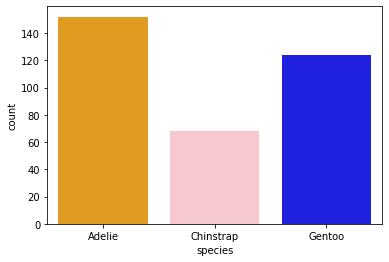

In [10]:
#  Visualization by species	
sns.countplot('species',data=df, palette=('Orange', 'Pink', 'Blue'))
plt.show()

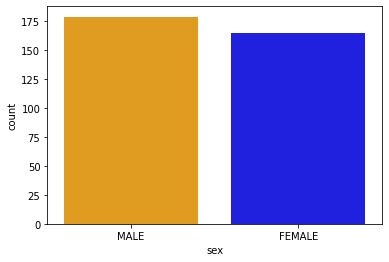

In [11]:
#  Visualization by Gender	
sns.countplot('sex',data=df, palette=('Orange', 'Blue'))
plt.show()

In [12]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

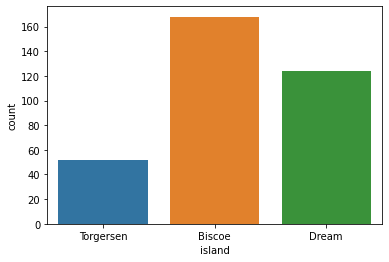

In [13]:
sns.countplot(x = "island", data = df)

# Model Initiation and Data Preparation

## Data Split and Preparation

In [14]:
#  COnverting text into numemrical values
dgender = {'MALE': 0, 'FEMALE': 1}
dspecies = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
disland = {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
newdf = df.copy()
newdf['species'] = df['species'].map(dspecies)
newdf['island'] = df['island'].map(disland)
newdf['sex'] = df['sex'].map(dgender)

In [15]:
print(df['island'].unique())

['Torgersen' 'Biscoe' 'Dream']


In [16]:
newdf

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.10000,18.70000,181.000000,3750.000000,0
1,0,0,39.50000,17.40000,186.000000,3800.000000,1
2,0,0,40.30000,18.00000,195.000000,3250.000000,1
3,0,0,43.92193,17.15117,200.915205,4201.754386,0
4,0,0,36.70000,19.30000,193.000000,3450.000000,1
...,...,...,...,...,...,...,...
339,2,1,43.92193,17.15117,200.915205,4201.754386,0
340,2,1,46.80000,14.30000,215.000000,4850.000000,1
341,2,1,50.40000,15.70000,222.000000,5750.000000,0
342,2,1,45.20000,14.80000,212.000000,5200.000000,1


In [17]:
X = newdf.drop(['sex'], axis='columns')
y = newdf["sex"]

In [18]:
#  Creating Dataset for training and testing from test.csv using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Initiation

In [20]:
#  Hyperparameter Tunning in GaussianNB using GridSearchCV
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}


In [21]:
# Usage og Hyper parameter with Cross checking valuei.e CV=5
kNeighbors_classifier = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
KNeighbors_classifierModel = GridSearchCV(kNeighbors_classifier, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
KNeighbors_classifierModel


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [22]:
# gaussModel.fit(X_train, y_train)
KNeighbors_classifierModel.fit(X_train, y_train)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [23]:
# save the model to disk
# joblib.dump(KNeighbors_classifierModel, modelfilepathwithName)
# save model
pickle.dump(KNeighbors_classifierModel, open(modelfilepathwithName, "wb"))

# Prediction

In [24]:
# Loading the save Model
# loaded_model_KNeighbors = pickle.load(open(modelfilepathwithName, 'rb')
loaded_model_KNeighbors = pickle.load(open(modelfilepathwithName, "rb"))

In [25]:
train_y_Prediction_KNeighbors = loaded_model_KNeighbors.predict(X_test)
train_y_Prediction_KNeighbors

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [26]:
# #  Seeing the accuracy level of the algorithm and models
print(metrics.accuracy_score(y_test, train_y_Prediction_KNeighbors))

0.9420289855072463


## Confusion Matrix

[Text(0, 0.5, 'Actual'), Text(0.5, 0, 'Predicted')]

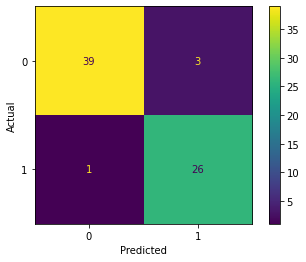

In [27]:
cm = confusion_matrix(y_test, train_y_Prediction_KNeighbors)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1','2'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='Actual')